In [1]:
import qiskit as q
%matplotlib inline

### [Link to Post](https://pythonprogramming.net/quantum-computer-programming-tutorial/)

In [5]:
# Most logic is executed by classical computer in bits.
# Some part of computation will be executed by quantum circuit and answer will be returned in bots (not qbits) 

circuit = q.QuantumCircuit(2,2)   # 2 qbits and 2 classicl bits

# currently : 0, 0
circuit.x(0)     # not gate on qbit 0
# 1, 0

circuit.cx(0, 1)     # cnot, controlled not, Flips 2nd qubit value IF first is 1
# 1, 1

circuit.measure([0, 1], [0, 1]) # [0, 1], [0, 1] means that if qbit is 0 -> output bit 0 and vice versa
circuit.draw()
#circuit.draw(output='mpl')

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [6]:
# To run on live Quantum computer
from qiskit import IBMQ

IBMQ.save_account('Enter_your_token')

In [7]:
IBMQ.load_account()

e:\application_repository\new_folder\envs\quantum\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'Simulation'
        
    print(backend.name(), 'has', backend.status().pending_jobs, 'qued and ', qubit_count, 'qubits')

ibmq_qasm_simulator has 0 qued and  Simulation qubits
ibmqx2 has 2 qued and  5 qubits
ibmq_16_melbourne has 8 qued and  15 qubits
ibmq_vigo has 2 qued and  5 qubits
ibmq_ourense has 60 qued and  5 qubits
ibmq_valencia has 30 qued and  5 qubits
ibmq_london has 0 qued and  5 qubits
ibmq_burlington has 0 qued and  5 qubits
ibmq_essex has 0 qued and  5 qubits
ibmq_armonk has 5 qued and  1 qubits
ibmq_santiago has 3 qued and  5 qubits


In [9]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend('ibmq_burlington')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


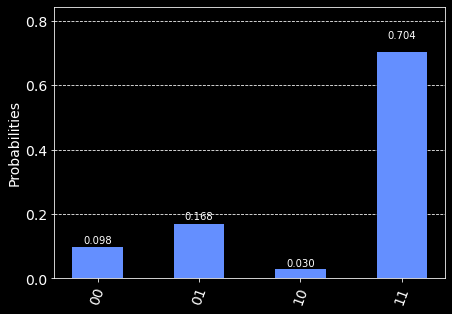

In [10]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use('dark_background')
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])